0.24 0.5763397549691927
0.0


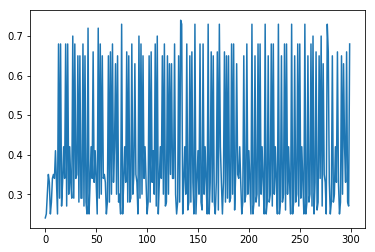

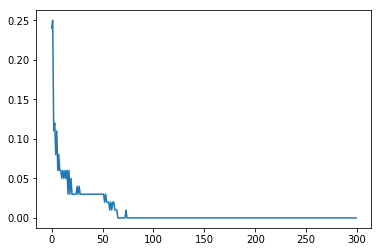

0.8541662601625051 0.0054014865826136115


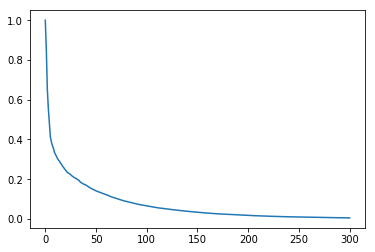

0.1787280701754386


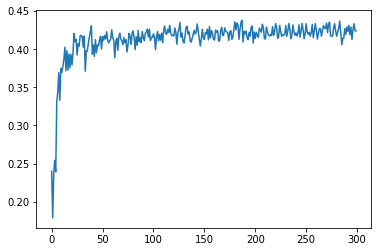

0.29 0.262


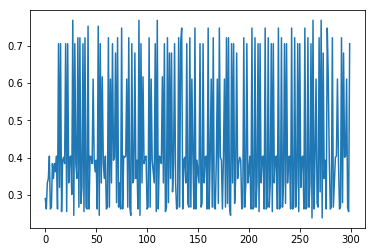

0.127


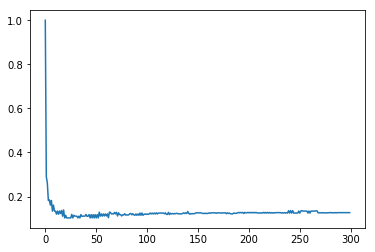

In [2]:


import numpy as np
import random
import matplotlib.pyplot as plt
import math

def decision_stump(x , y, u):
    size = x.size   
    sorted_x = np.sort(x)
    thetas = []
    thetas.append(sorted_x[0]-1)
    for i in range(size-2):
        thetas.append((sorted_x[i] + sorted_x[i+1]) / 2)

    pocket_err = 1
    for theta in thetas:
        s = 1
        y_predict = np.sign(x-theta)
        err = np.sum((y!=y_predict)*u) / size
        err2 = np.sum((y!=(-1*y_predict))*u) / size
        if err2 < err:
            err = err2
            s = -1
        if err < pocket_err or (err==pocket_err and random.random()>0.5):
            pocket_s = s
            pocket_theta = theta
            pocket_err = err
    return pocket_s, pocket_theta, pocket_err

def decision_stump_md(X , y, u):
    m,n = X.shape
    pocket_err = 1
    for i in range(n):
        s,theta,err = decision_stump(X[:,i], y, u)
        if err < pocket_err or (err==pocket_err and random.random()>0.5):
            pocket_s = s
            pocket_theta = theta
            pocket_err = err
            pocket_feature = i
    return pocket_feature, pocket_s,pocket_theta,pocket_err
    
def get_e_in_Gt(X, y, A_list, alpha_list):
    T = len(alpha_list)
    total = 0
    for t in range(T):
        A = A_list[t]
        alpha = alpha_list[t]
        y_predict = A[1]*np.sign(X[:,A[0]]-A[2])
        total = total + alpha*y_predict
    return np.sum(np.sign(total)!=y) / len(y)
    
def ada_boost(X, y, T):
    m,n = X.shape
    u = np.ones(m) / m
    A_list = []
    alpha_list = []
    e_in_gt_list = []
    e_in_Gt_list = []
    ut_list = []
    ut_list.append(np.sum(u))
    et_list = []
    for t in range(T):
        A = decision_stump_md(X, y, u)
        e_t = A[3]*m/np.sum(u)
        dalta_t = math.sqrt((1-e_t)/e_t)
        y_predict = A[1]*np.sign(X[:,A[0]]-A[2])
        u = np.where(y!=y_predict, u * dalta_t, u / dalta_t)
        alpha = math.log(dalta_t)
        A_list.append(A)
        alpha_list.append(alpha)
        e_in_Gt = get_e_in_Gt(X, y, A_list, alpha_list)
        e_in_gt = np.sum(y!=y_predict) / m
        e_in_Gt_list.append(e_in_Gt)
        e_in_gt_list.append(e_in_gt)
        ut_list.append(np.sum(u))
        et_list.append(e_t)
    return A_list, alpha_list, e_in_gt_list, e_in_Gt_list, ut_list,et_list
    
data = np.loadtxt('hw3_train.dat.txt')
X = data[:,:-1]
y = data[:,-1]
A_list, alpha_list, e_in_gt_list, e_in_Gt_list, ut_list,et_list = ada_boost(X, y, 300)

#12
print(e_in_gt_list[0], alpha_list[0])
plt.plot(e_in_gt_list)
#14
print(e_in_Gt_list[-1])
plt.figure()
plt.plot(e_in_Gt_list)
plt.show()
#15
print(ut_list[1],ut_list[-1])
plt.figure()
plt.plot(ut_list)
plt.show()
#16
print(np.min(et_list))
plt.figure()
plt.plot(et_list)
plt.show()

data2 = np.loadtxt('hw3_test.dat.txt')
X2 = data2[:,:-1]
y2 = data2[:,-1]
e_out_g_list = []
e_out_G_list = []
for t in range(len(alpha_list)):
    A = A_list[t]
    y2_predict = A[1]*np.sign(X2[:,A[0]]-A[2])
    e_out_g = np.sum(y2!=y2_predict)/len(y2)
    e_out_g_list.append(e_out_g)
    e_out_G_list.append(get_e_in_Gt(X2, y2, A_list[:t],alpha_list[:t]))
#17
print(e_out_g_list[0],e_out_g_list[1])
plt.figure()
plt.plot(e_out_g_list)
plt.show()
#18
print(e_out_G_list[-1])
plt.figure()
plt.plot(e_out_G_list)
plt.show()

Q11:  Ein_g1= 0.24  alpha_1= 0.5763397549691927


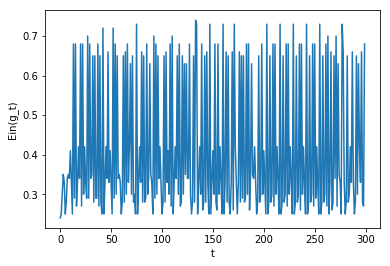

Q13:  0.0


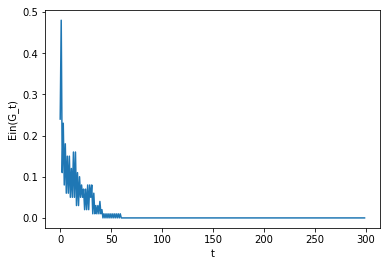

Q14:  U2= 0.8541662601625051  UT= 0.0054014865826136115


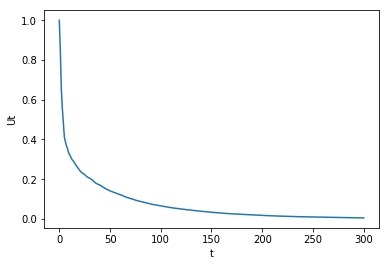

Q15:  0.29


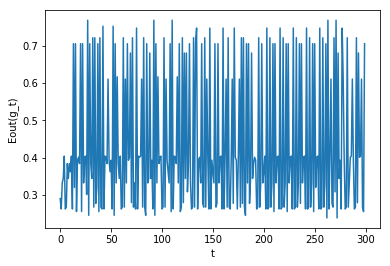

Q16:  0.138


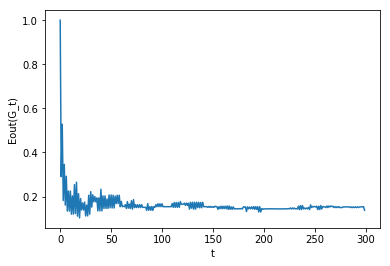

In [12]:
## Date: 2018-06-10
## Purpose: Machine Learning Techniques hw3
## Author: Po-Chu Chen

import numpy as np
import random
import matplotlib.pyplot as plt
import math

def decision_stump(x , y, u):
    size = x.size   
    sorted_x = np.sort(x)
    thetas = []
    thetas.append(sorted_x[0]-1)
    for i in range(size-2):
        thetas.append((sorted_x[i] + sorted_x[i+1]) / 2)

    pocket_err = 1
    for theta in thetas:
        s = 1
        y_predict = np.sign(x-theta)
        err = np.sum((y!=y_predict)*u) / size
        err2 = np.sum((y!=(-1*y_predict))*u) / size
        if err2 < err:
            err = err2
            s = -1
        if err < pocket_err or (err==pocket_err and random.random()>0.5):
            pocket_s = s
            pocket_theta = theta
            pocket_err = err
    return pocket_s, pocket_theta, pocket_err

def decision_stump_md(X , y, u):
    m,n = X.shape
    pocket_err = 1
    for i in range(n):
        s,theta,err = decision_stump(X[:,i], y, u)
        if err < pocket_err or (err==pocket_err and random.random()>0.5):
            pocket_s = s
            pocket_theta = theta
            pocket_err = err
            pocket_feature = i
    return pocket_feature, pocket_s,pocket_theta,pocket_err
    
def get_e_in_Gt(X, y, A_list, alpha_list):
    T = len(alpha_list)
    total = 0
    for t in range(T):
        A = A_list[t]
        alpha = alpha_list[t]
        y_predict = A[1]*np.sign(X[:,A[0]]-A[2])
        total = total + np.sign(alpha*y_predict) # revised version 
    return np.sum(np.sign(total)!=y) / len(y)
    
def ada_boost(X, y, T):
    m,n = X.shape
    u = np.ones(m) / m
    A_list = []
    alpha_list = []
    e_in_gt_list = []
    e_in_Gt_list = []
    ut_list = []
    ut_list.append(np.sum(u))
    et_list = []
    for t in range(T):
        A = decision_stump_md(X, y, u)
        e_t = A[3]*m/np.sum(u)
        dalta_t = math.sqrt((1-e_t)/e_t)
        y_predict = A[1]*np.sign(X[:,A[0]]-A[2])
        u = np.where(y!=y_predict, u * dalta_t, u / dalta_t)
        alpha = math.log(dalta_t)
        A_list.append(A)
        alpha_list.append(alpha)
        e_in_Gt = get_e_in_Gt(X, y, A_list, alpha_list)
        e_in_gt = np.sum(y!=y_predict) / m
        e_in_Gt_list.append(e_in_Gt)
        e_in_gt_list.append(e_in_gt)
        ut_list.append(np.sum(u))
        et_list.append(e_t)
    return A_list, alpha_list, e_in_gt_list, e_in_Gt_list, ut_list,et_list
    
data = np.loadtxt('hw3_train.dat.txt')
X = data[:,:-1]
y = data[:,-1]
A_list, alpha_list, e_in_gt_list, e_in_Gt_list, ut_list,et_list = ada_boost(X, y, 300)

#11
print("Q11: ","Ein_g1=",e_in_gt_list[0]," alpha_1=",alpha_list[0])
plt.plot(e_in_gt_list)
plt.ylabel("Ein(g_t)")
plt.xlabel("t")
plt.show()
#13
print("Q13: ",e_in_Gt_list[-1])
plt.figure()
plt.plot(e_in_Gt_list)
plt.ylabel("Ein(G_t)")
plt.xlabel("t")
plt.show()
#14
print("Q14: ","U2=",ut_list[1]," UT=",ut_list[-1])
plt.figure()
plt.plot(ut_list)
plt.ylabel("Ut")
plt.xlabel("t")
plt.show()


data2 = np.loadtxt('hw3_test.dat.txt')
X2 = data2[:,:-1]
y2 = data2[:,-1]
e_out_g_list = []
e_out_G_list = []
for t in range(len(alpha_list)):
    A = A_list[t]
    y2_predict = A[1]*np.sign(X2[:,A[0]]-A[2])
    e_out_g = np.sum(y2!=y2_predict)/len(y2)
    e_out_g_list.append(e_out_g)
    e_out_G_list.append(get_e_in_Gt(X2, y2, A_list[:t],alpha_list[:t]))
#15
print("Q15: ",e_out_g_list[0])
plt.figure()
plt.plot(e_out_g_list)
plt.ylabel("Eout(g_t)")
plt.xlabel("t")
plt.show()
#16
print("Q16: ",e_out_G_list[-1])
plt.figure()
plt.plot(e_out_G_list)
plt.ylabel("Eout(G_t)")
plt.xlabel("t")
plt.show()